<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [79]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [141]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [81]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [82]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [83]:
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

Text(0, 0.5, "Median Value by The $1000's")

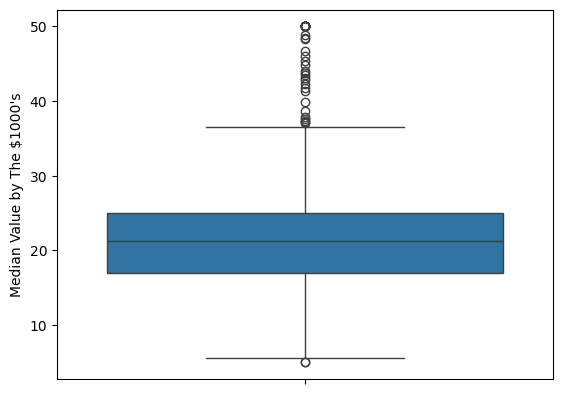

In [105]:
sns.boxplot(y="MEDV", data=boston_df)
pyplot.ylabel("Median Value by The $1000's")

Text(0.5, 28.999999999999986, 'Bound or Not')

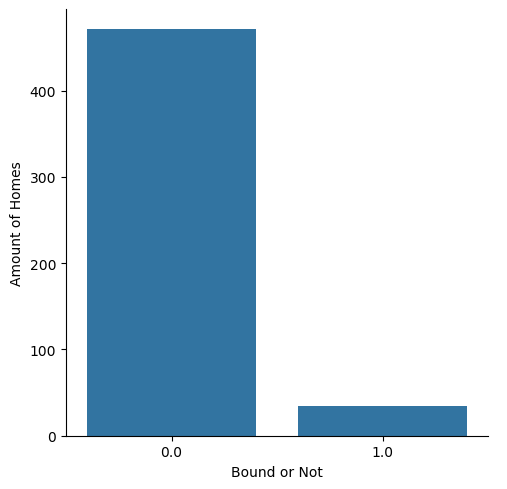

In [148]:
sns.catplot(x="CHAS", kind="count", data=boston_df)
pyplot.ylabel("Amount of Homes")
pyplot.xlabel("Bound or Not")

Text(0, 0.5, 'Median Value of Homes')

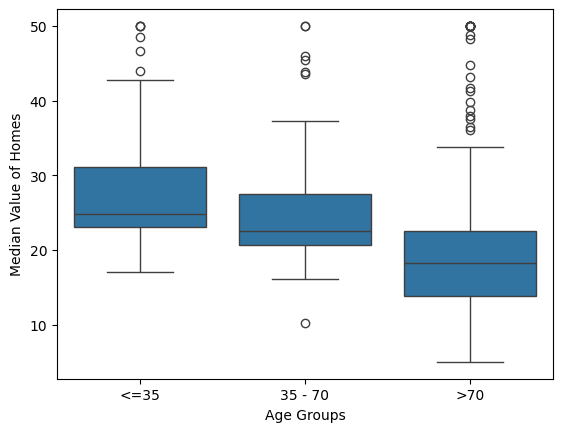

In [100]:
age_bins = [0, 35, 70, 100]
age_labels = ["<=35", "35 - 70", ">70"]
boston_df["Age_Group"] = pd.cut(boston_df["AGE"], bins=age_bins, labels=age_labels)

sns.boxplot(x="Age_Group", y="MEDV", data=boston_df)
pyplot.xlabel("Age Groups")
pyplot.ylabel("Median Value of Homes")

Text(0, 0.5, 'Non Retail Business Acres In Town')

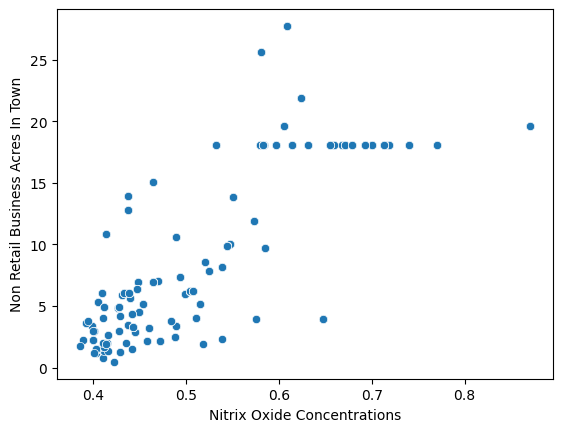

In [102]:
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.xlabel("Nitrix Oxide Concentrations")
pyplot.ylabel("Non Retail Business Acres In Town")

Text(0.5, 0, 'Ratio of Pupils to Teachers')

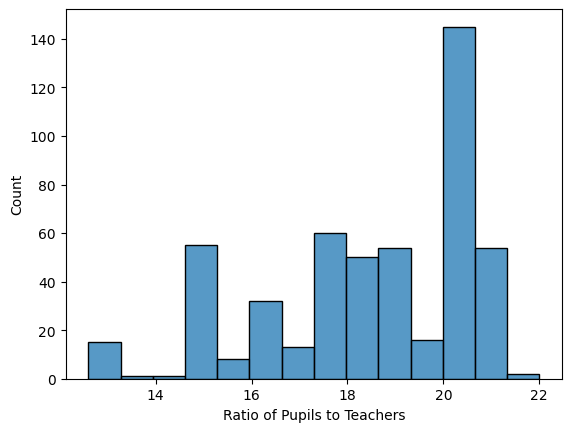

In [103]:
sns.histplot(x="PTRATIO", data=boston_df)
pyplot.xlabel("Ratio of Pupils to Teachers")

__Is there a significant difference in median value of houses bound by the Charles River or not?__

In [146]:
# Hypothesis: 

# H0 = There is no significant difference in median value of houses bound by the Charles River
# H1 = There is a significant difference in median value of houses bound by the Charles River


In [116]:
medv_chas_1 = boston_df[boston_df["CHAS"] == 1] ["MEDV"]
medv_chas_0 = boston_df[boston_df["CHAS"] == 0] ["MEDV"]

t_stat, p_value = scipy.stats.ttest_ind(medv_chas_1, medv_chas_0)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 3.9964
P-value: 0.0001


In [140]:
# Since the P value is less than 0.05, we reject the hypothesis and there is a significant difference in median value of houses bound by the Charles River

__Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?__

In [117]:
# Hypothesis

# H0 = There is no significant difference in Median values of houses for each proportion of owner occupied units built prior to 1940
# H1 = There is a significant different in Median values of houses for each proportion of owner occupied units built prior to 1940

In [132]:
age_bins = [0, 35, 70, 100]
age_labels = ["<=35", "35-70", ">70"]
boston_df["Age_Group"] = pd.cut(boston_df["AGE"], bins=age_bins, labels=age_labels)

In [159]:
anova_result = stats.f_oneway(
    boston_df[boston_df["Age_Group"] == "<=35"]["MEDV"],
    boston_df[boston_df["Age_Group"] == "35-70"]["MEDV"],
    boston_df[boston_df["Age_Group"] == ">70"]["MEDV"]
)
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

F-statistic: 36.4076
P-value: 0.0000


In [139]:
# Since the P value is less than 0.05, we reject the hypothesis and there is a signigicant difference in Median values of houses for each proportion of owner occupied units priot to 1940

__Can we conclude thar there is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town?__

In [135]:
# Hypothesis

# H0 = There is no linear relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town
# H1 = There is a linear relationship between Nitroc Oxide concentrations and proportion of non-retail business acres per town

In [155]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [137]:
# Since the P value is less than 0.05, we reject the hypothesis and there is a significant difference between Nitric Oxide concentrations and proportion of non-retail business acres per town

__What is the impact of an additional weighted distance to the five Boston employee centers on the median value of owner occupied homes?__

In [138]:
# Hypothesis

# H0 = There is no impact of an additional weighted distance to the five Boston employees on the median value of owner occupied homes
# H1 = There is an impact of an additional weighted distance to the five Boston employees on the median value of owner occupied homes

In [154]:
y = boston_df["MEDV"]
X = sm.add_constant(boston_df["DIS"]) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        18:13:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Since the P value is less than 0.05, er reject the null hypothesis, and there is an impact of an additional weighted distance to the five Boston employees on the median value of owner occupied homes. 